In [1]:
#Import the file and assign Cdelt and CritVal

import astropy
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

hdulist = fits.open('apStar-r5-2M04411627+5855354.fits')

spectra_hdu = hdulist[1]
error_hdu = hdulist[2]

crval = spectra_hdu.header['CRVAL1']
cdelt = spectra_hdu.header['CDELT1']

print(crval)
print(cdelt)

4.179
6e-06


In [2]:
#Spectra 1 information

spectra_data = spectra_hdu.data
visit_one_data = spectra_data[8,:]

#Error in spectra 1 information

error_data = error_hdu.data
visit_one_error_data = error_data[8,:]

In [3]:
#Wavelength Function and to-CSV

startwave = 10**crval
space = 10**cdelt
nwave = np.arange(8575)

def waves():
    nwave2 = startwave*(space**nwave)
    return nwave2

wavelengs = waves()
wavelengs.shape

df = pd.DataFrame({'flux': visit_one_data, "gb":visit_one_error_data,'wavelengths':wavelengs})
df.to_csv(r'2M03262508+8007344_spectra1.csv')

In [4]:
#Spectra 2 information

spectra2_data = spectra_hdu.data
visit_two_data = spectra2_data[7,:]

#Error in spectra 2 information

error2_data = error_hdu.data
visit_two_error_data = error2_data[7,:]

#Spectra 2 dataframe

df2 = pd.DataFrame({'flux': visit_two_data, "gb":visit_two_error_data,'wavelengths':wavelengs})
df2.to_csv(r'2M03262508+8007344_spectra2.csv')

<IPython.core.display.Javascript object>


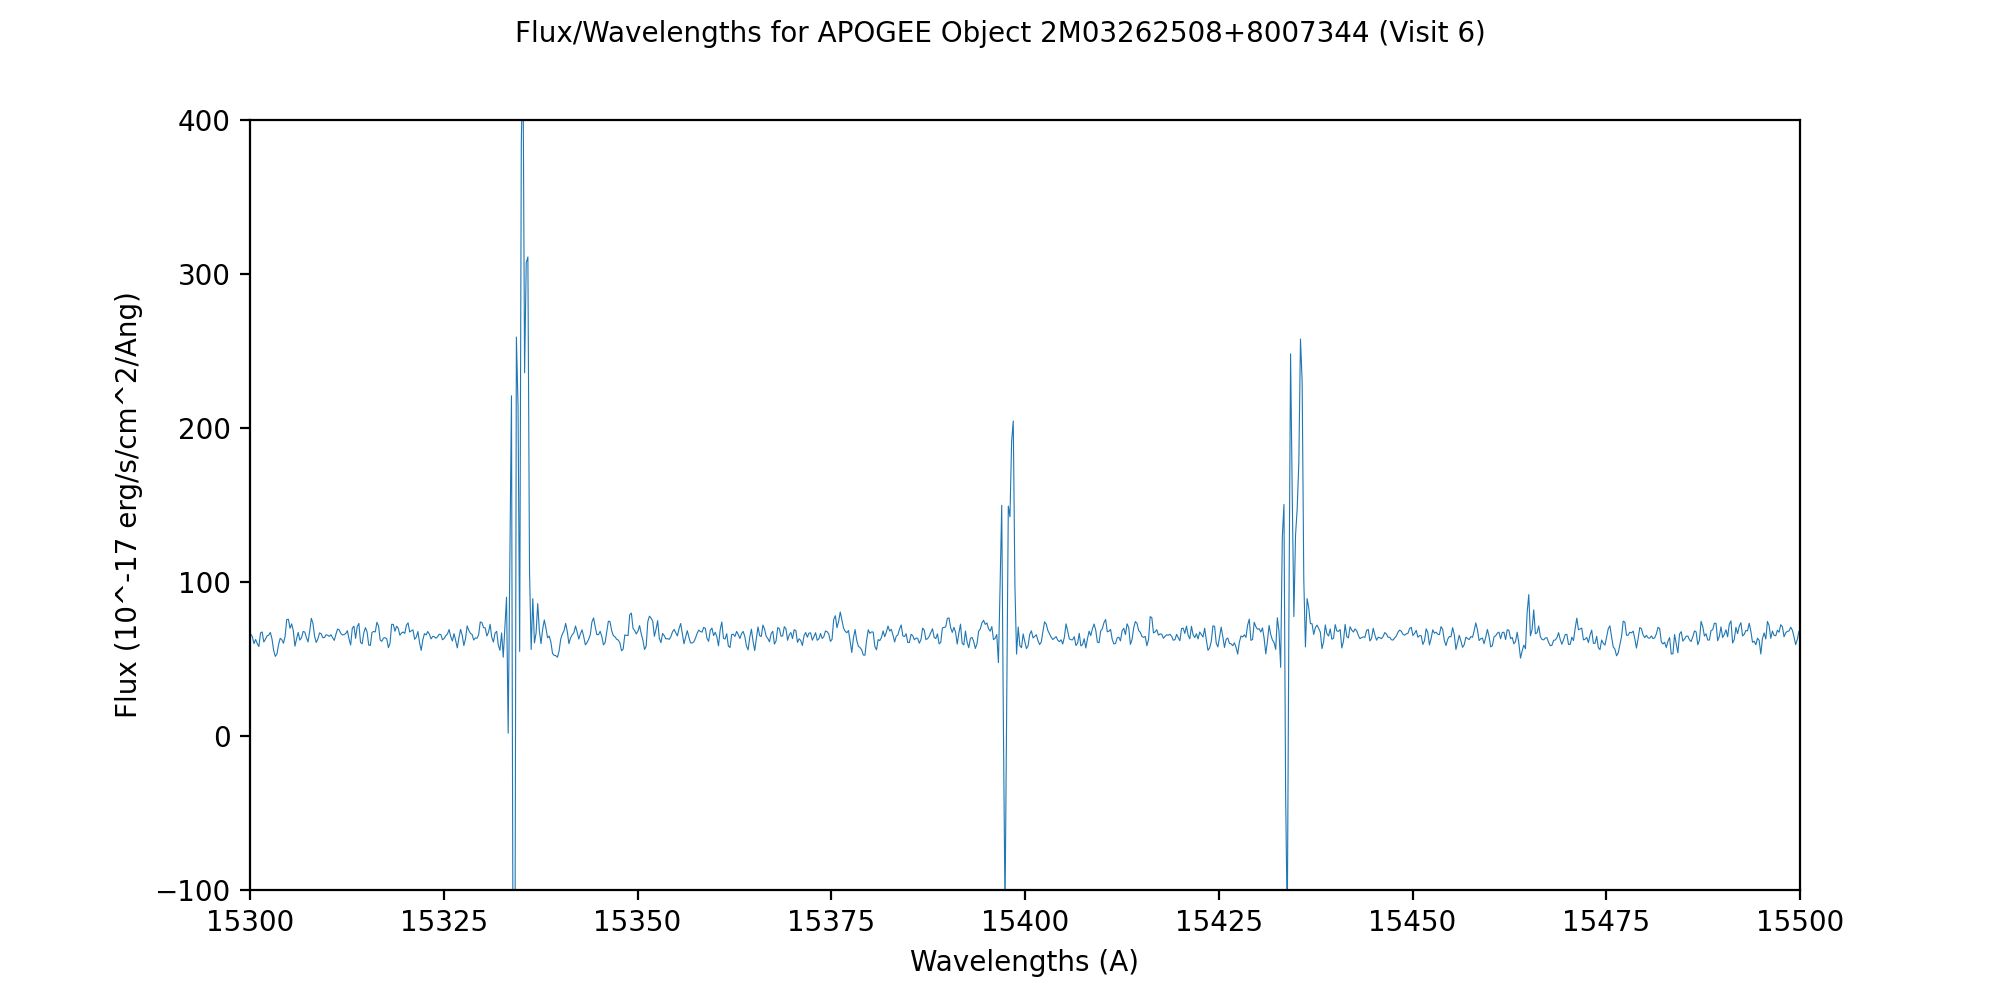

In [5]:
#Plotting of Individual Spectra #1

%matplotlib notebook

fig, ax= plt.subplots(figsize=(10, 5))
plot = ax.plot(df.wavelengths, df.flux, label = 'Flux/Wavelengths for APOGEE Object 2M03262508+8007344 (Visit 6)',linewidth = .4)
ax.set_xlim([15300,15500])
ax.set_ylim([-100, 400])
fig.suptitle('Flux/Wavelengths for APOGEE Object 2M03262508+8007344 (Visit 6)', fontsize=10)
plt.xlabel('Wavelengths (A)', fontsize=10)
plt.ylabel('Flux (10^-17 erg/s/cm^2/Ang)', fontsize=10)
fig.show()

<IPython.core.display.Javascript object>


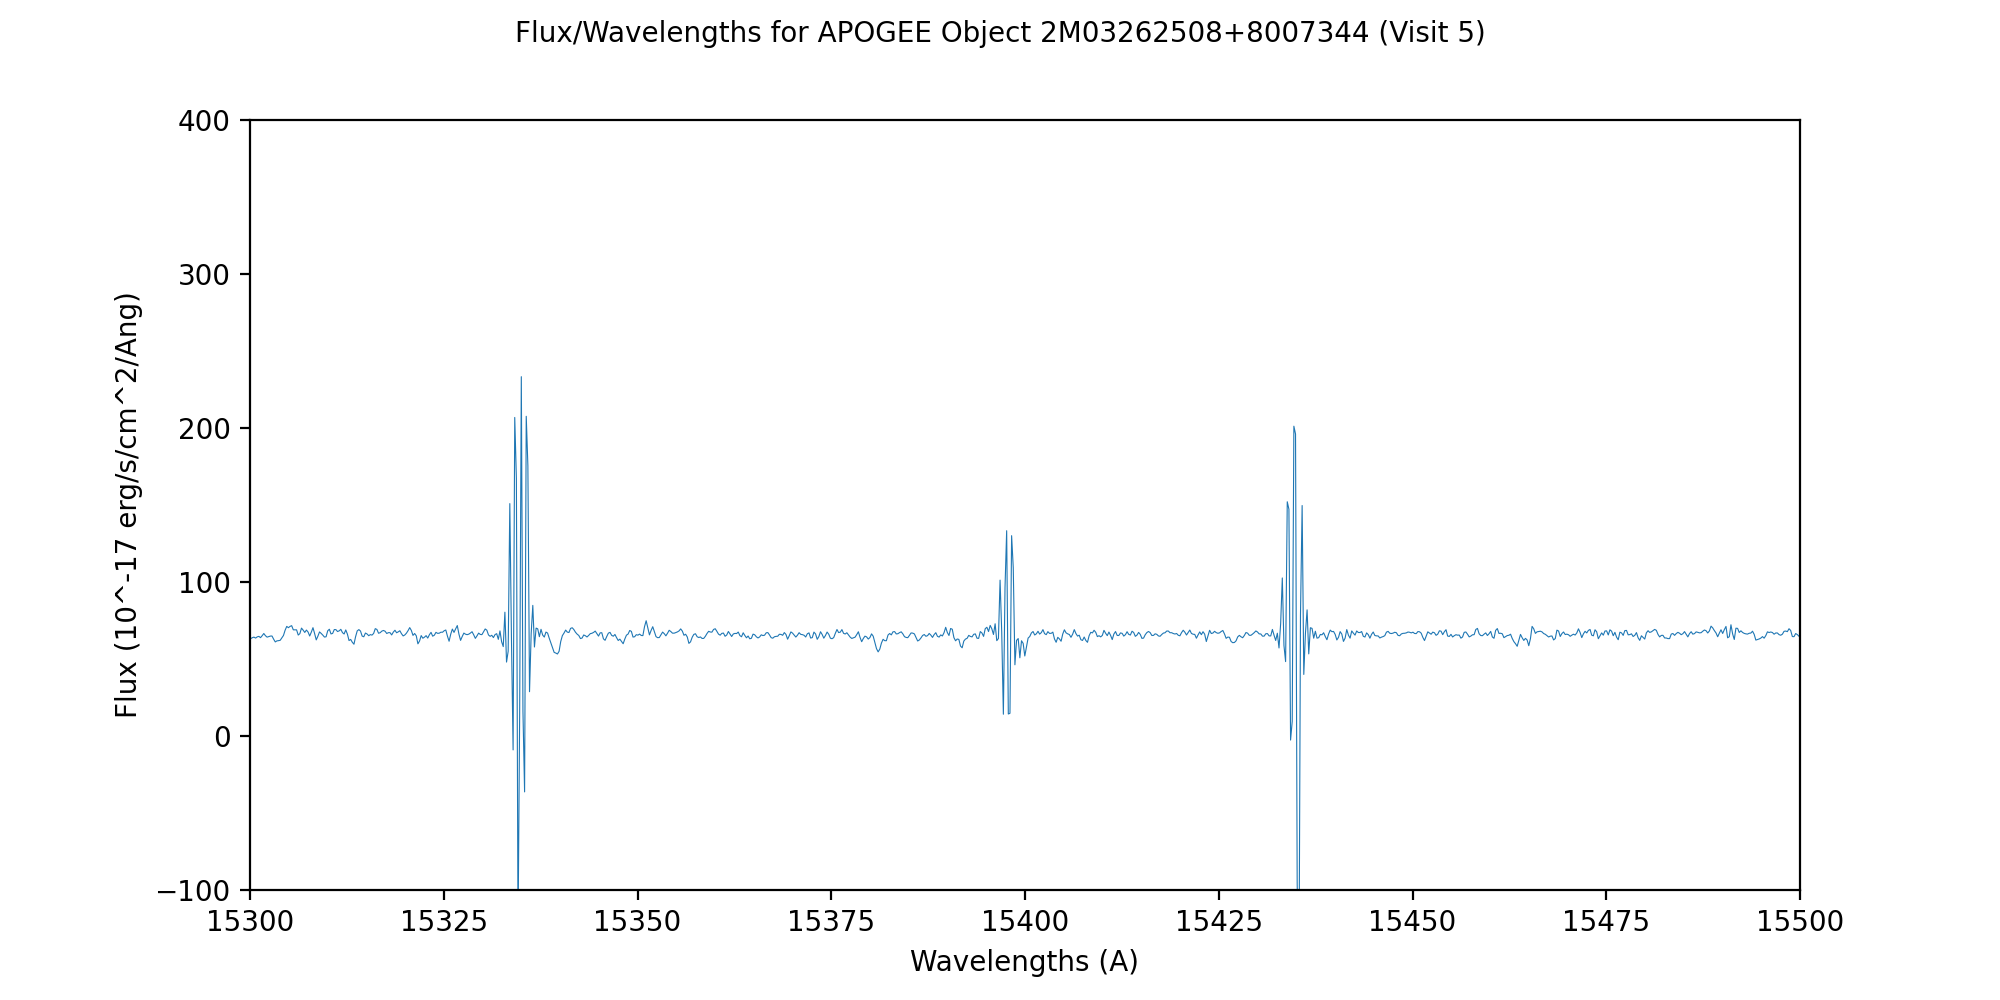

In [6]:
#Plotting of Individual Spectra #2

%matplotlib notebook

fig, ax= plt.subplots(figsize=(10, 5))
plot = ax.plot(df2.wavelengths, df2.flux, label = 'Flux/Wavelengths for APOGEE Object 2M03262508+8007344 (Visit 5)',linewidth = .4)
ax.set_xlim([15300,15500])
ax.set_ylim([-100, 400])
fig.suptitle('Flux/Wavelengths for APOGEE Object 2M03262508+8007344 (Visit 5)', fontsize=10)
plt.xlabel('Wavelengths (A)', fontsize=10)
plt.ylabel('Flux (10^-17 erg/s/cm^2/Ang)', fontsize=10)
fig.show()


In [7]:
#Radial Velocity for visits

rvbin = hdulist[9]
rvbin.header

RV = rvbin.header['TTYPE5']
RVdata = rvbin.data[RV]

RVdata

array([[4121, 4121, 4121, 4121, 4121, 4121, 4121, 4121, 4121, 4121, 4121,
        4121]], dtype=int16)

In [9]:
hdulist.info()

Filename: apStar-r5-2M04411627+5855354.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     303   ()      
  1                1 ImageHDU        13   (8575, 14)   float32   
  2                1 ImageHDU        13   (8575, 14)   float32   
  3                1 ImageHDU        13   (8575, 14)   int16   
  4                1 ImageHDU        13   (8575, 14)   float32   
  5                1 ImageHDU        13   (8575, 14)   float32   
  6                1 ImageHDU        13   (8575, 14)   float32   
  7                1 ImageHDU        13   (8575, 14)   float32   
  8                1 ImageHDU        29   (27,)   float64   
  9                1 BinTableHDU     82   1R x 29C   ['360A', '12I', '48A', '12J', '12I', '12D', '12E', '12E', '12E', '12E', '2I', '2E', '2E', '2E', '2E', 'E', 'E', 'E', 'E', 'E', '12E', '12E', '12E', '5614E', '5614E', '401E', 'D', 'D', '401E']   
